In [ ]:
import pandas as pd
import random

In [ ]:
df_from_excel = pd.read_feather('/work/ED_Model_-_Populated_v1.3_v2.ftr')

In [ ]:
df_from_excel.head()

,Date,Hour range,Hour,stream,value
0,2017-02-27,00:00 - 00:59,0,Majors,1
1,2017-02-27,01:00 - 01:59,1,Majors,1
2,2017-02-27,02:00 - 02:59,2,Majors,0
3,2017-02-27,03:00 - 03:59,3,Majors,0
4,2017-02-27,04:00 - 04:59,4,Majors,1


In [ ]:
# Drop rows where value = 0 (i.e. no patients arrived)

In [ ]:
df_from_excel = df_from_excel[df_from_excel['value'] != 0]

# Generate row per individual

Use count value to generate a new row per individual, then concat all of the resulting dataframes. 

iterrows?

In [ ]:
new_df = []

In [ ]:
for index, row in df_from_excel.iterrows():
    n_per_hour = row.value
    for i in range(n_per_hour):
        new_df.append(row)

In [ ]:
len(df_from_excel)

31865

In [ ]:
len(new_df)

78665

In [ ]:
new_df[0]

Date          2017-02-27 00:00:00
Hour range          00:00 - 00:59
Hour                            0
stream                     Majors
value                           1
Name: 0, dtype: object

In [ ]:
individual_df = pd.DataFrame(new_df)

In [ ]:
individual_df.head()

,Date,Hour range,Hour,stream,value
0,2017-02-27,00:00 - 00:59,0,Majors,1
1,2017-02-27,01:00 - 01:59,1,Majors,1
4,2017-02-27,04:00 - 04:59,4,Majors,1
8,2017-02-27,08:00 - 08:59,8,Majors,2
8,2017-02-27,08:00 - 08:59,8,Majors,2


# Randomly generate a datetime column within given hour parameters

In [ ]:
individual_df['datetime_generated'] = individual_df.apply(
    lambda x: x['Date'].date().strftime("%Y-%m-%d") 
              + " "
              + str(x['Hour']).zfill(2)
              + ":"
              + str(round(random.uniform(0,59))).zfill(2)
, axis=1)

# Remove 'value' column

In [ ]:
individual_df = individual_df.drop('value', axis=1)

# Replace some values

In [ ]:
def random_replacement(value, options, probability):
    '''
    Randomly change some values in a dataframe column
    '''
    
    try:
        options=options.remove(value)
    except:
        pass

    if random.uniform(0,1) < probability:
        return random.choices(options, weights = [1 / len(options) for i in range(len(options))])[0]
    else:
        return value
    

In [ ]:
individual_df['randomised_stream_col'] = (
    individual_df['stream'].apply(
        random_replacement, 
        args=(individual_df['stream'].unique(), 0.1)
        )
)

In [ ]:
f"The proportion of values which differ are {(((individual_df['stream'] != individual_df['randomised_stream_col']).sum() / len(individual_df))*100).round(2)}%"

'The proportion of values which differ are 6.65%'

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Hour'}>]], dtype=object)

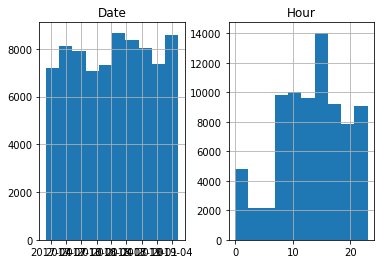

In [ ]:
individual_df.hist()

In [ ]:
individual_df.to_csv('record_format_from_excel_populated_1.3.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a56ed435-0fca-4e33-b393-07cccaf98df7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>